# First program

This is my first program

In [2]:
print('hello woprld')

hello woprld


In [2]:
!pip install pandas
!pip install seaborn

In [339]:
import pandas as pd 
import seaborn as sns

In [340]:
df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")

C:\Users\PC\AppData\Local\Temp\ipykernel_24288\2350612576.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")


In [341]:
df.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
5,2018,06.01.2018,Selva Costera (CHI),50km,22,6:25:01 h,NaN,ARG,1974.0,M,M40,7.792,5
6,2018,06.01.2018,Selva Costera (CHI),50km,22,6:28:00 h,Los Patagones,ARG,1979.0,F,W35,7.732,6
7,2018,06.01.2018,Selva Costera (CHI),50km,22,6:32:24 h,Reaktiva Chile,CHI,1967.0,F,W50,7.645,7
8,2018,06.01.2018,Selva Costera (CHI),50km,22,6:39:08 h,Puro Trail Osorno,CHI,1985.0,M,M23,7.516,8
9,2018,06.01.2018,Selva Costera (CHI),50km,22,6:45:11 h,Marlene Flores Team,CHI,1976.0,M,M40,7.404,9


In [342]:
#wielkosc bazy danych

df.shape

(7461195, 13)

In [343]:
#rodzaje wyników

df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [344]:
#clean data
#we will show the results from races in UK, 50km or 50 miles, year 2020
df[df["Event distance/length"].isin(['50km'])]


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461089,1995,07.01.1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:19:56 h,*QLD,AUS,1956.0,F,W35,11541.0,1046326
7461090,1995,07.01.1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:28:57 h,*QLD,AUS,1954.0,M,M40,11154.0,1070007
7461091,1995,07.01.1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:46:39 h,*QLD,AUS,1951.0,M,M40,10466.0,345672
7461092,1995,07.01.1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:47:39 h,*QLD,AUS,1939.0,M,M55,10429.0,1082443


In [345]:
df[(df["Event distance/length"].isin(['50mi','50km']))   &  (df['Year of event'] == 2020)]


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2538571,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:34:19 h,日本隊,JPN,1965.0,M,M50,10.627,53107
2538572,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:43:50 h,NaN,AUS,1974.0,M,M45,10.409,8785
2538573,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:04:40 h,NaN,TPE,1976.0,M,M40,9.962,4502
2538574,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:30:49 h,台灣大腳ㄚ長跑協會,TPE,1969.0,F,W50,9.452,63964
2538575,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:34:47 h,NaN,TPE,1964.0,M,M55,9.379,4485
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762404,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:25 h,AKS Polonia Warszawa,POL,1981.0,F,W35,6.573,860743
2762405,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:27 h,*Warszawa,POL,1970.0,F,W45,6.572,860744
2762406,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:44:18 h,Outdoor Training,POL,1993.0,F,W23,6.461,860745
2762407,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,8:04:50 h,PH Bysewo Gdańsk,POL,1976.0,M,M40,6.188,798409


In [346]:
df[df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


In [347]:
df2 = df[(df["Event distance/length"].isin(['50km']))   &  (df['Year of event'] == 2019) 
& (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'POL')]


In [348]:
df2.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
1873698,2019,27.04.2019,Ultramaraton Podkarpacki 50km (POL),50km,172,3:57:28 h,Jaroslawska Grupa Bieg...,POL,1987.0,M,M23,12.633,321631
1873699,2019,27.04.2019,Ultramaraton Podkarpacki 50km (POL),50km,172,3:58:03 h,*Warszawa,POL,1983.0,M,M35,12.602,227705
1873700,2019,27.04.2019,Ultramaraton Podkarpacki 50km (POL),50km,172,4:04:21 h,*Rzeszow,POL,1987.0,M,M23,12.277,211723
1873701,2019,27.04.2019,Ultramaraton Podkarpacki 50km (POL),50km,172,4:07:03 h,Rzeszowskie Gazele I G...,POL,1986.0,M,M23,12.143,204917
1873702,2019,27.04.2019,Ultramaraton Podkarpacki 50km (POL),50km,172,4:22:36 h,Asseco Active Team,POL,1982.0,M,M35,11.424,661097
1873703,2019,27.04.2019,Ultramaraton Podkarpacki 50km (POL),50km,172,4:25:42 h,Finisz Rymanow,POL,1985.0,M,M23,11.291,211727
1873704,2019,27.04.2019,Ultramaraton Podkarpacki 50km (POL),50km,172,4:28:04 h,*Wejherowo,POL,1970.0,M,M45,11.191,238405
1873705,2019,27.04.2019,Ultramaraton Podkarpacki 50km (POL),50km,172,4:29:15 h,Rzeszowskie Gazele I G...,POL,1977.0,M,M40,11.142,211725
1873706,2019,27.04.2019,Ultramaraton Podkarpacki 50km (POL),50km,172,4:31:56 h,Walkabout Team,POL,1989.0,M,M23,11.032,191771
1873707,2019,27.04.2019,Ultramaraton Podkarpacki 50km (POL),50km,172,4:37:50 h,Delekta Team,POL,1980.0,M,M35,10.798,211736


In [349]:
df2.shape

(810, 13)

In [350]:
#remove POL from event name

df2['Event name'] = df2['Event name'].str.split('(').str.get(0)

C:\Users\PC\AppData\Local\Temp\ipykernel_24288\961556408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event name'] = df2['Event name'].str.split('(').str.get(0)


In [351]:
df2.head

<bound method NDFrame.head of          Year of event Event dates                      Event name  \
1873698           2019  27.04.2019  Ultramaraton Podkarpacki 50km    
1873699           2019  27.04.2019  Ultramaraton Podkarpacki 50km    
1873700           2019  27.04.2019  Ultramaraton Podkarpacki 50km    
1873701           2019  27.04.2019  Ultramaraton Podkarpacki 50km    
1873702           2019  27.04.2019  Ultramaraton Podkarpacki 50km    
...                ...         ...                             ...   
2437859           2019  06.10.2019         Ultra Silesia Marathon    
2437860           2019  06.10.2019         Ultra Silesia Marathon    
2437861           2019  06.10.2019         Ultra Silesia Marathon    
2437862           2019  06.10.2019         Ultra Silesia Marathon    
2437863           2019  06.10.2019         Ultra Silesia Marathon    

        Event distance/length  Event number of finishers Athlete performance  \
1873698                  50km                    

In [352]:
#clean up athlete athlete age

In [353]:
df2['athlete age'] = 2020 - df2['Athlete year of birth']

C:\Users\PC\AppData\Local\Temp\ipykernel_24288\620971434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['athlete age'] = 2020 - df2['Athlete year of birth']


In [354]:
#removing h from athlete performance
df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)


C:\Users\PC\AppData\Local\Temp\ipykernel_24288\2946046738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)


In [355]:
#removing h from athlete performance

df2['Athlete age category'] = df2['Athlete age category'].replace(['M23', 'W23', 'M35', 'W35','M40','W40','M45', 'W45','M50', 'W50','M55', 'W55','M60', 'W60','M65', 'W65','MU23'],
                 ['23', '23', '35','35','45','45','45','45','50','50','55','55','60','60','65','65','23'])


C:\Users\PC\AppData\Local\Temp\ipykernel_24288\785354258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete age category'] = df2['Athlete age category'].replace(['M23', 'W23', 'M35', 'W35','M40','W40','M45', 'W45','M50', 'W50','M55', 'W55','M60', 'W60','M65', 'W65','MU23'],


In [356]:
df2.head(60)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete age
1873698,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,172,3:57:28,Jaroslawska Grupa Bieg...,POL,1987.0,M,23,12.633,321631,33.0
1873699,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,172,3:58:03,*Warszawa,POL,1983.0,M,35,12.602,227705,37.0
1873700,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,172,4:04:21,*Rzeszow,POL,1987.0,M,23,12.277,211723,33.0
1873701,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,172,4:07:03,Rzeszowskie Gazele I G...,POL,1986.0,M,23,12.143,204917,34.0
1873702,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,172,4:22:36,Asseco Active Team,POL,1982.0,M,35,11.424,661097,38.0
1873703,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,172,4:25:42,Finisz Rymanow,POL,1985.0,M,23,11.291,211727,35.0
1873704,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,172,4:28:04,*Wejherowo,POL,1970.0,M,45,11.191,238405,50.0
1873705,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,172,4:29:15,Rzeszowskie Gazele I G...,POL,1977.0,M,45,11.142,211725,43.0
1873706,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,172,4:31:56,Walkabout Team,POL,1989.0,M,23,11.032,191771,31.0
1873707,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,172,4:37:50,Delekta Team,POL,1980.0,M,35,10.798,211736,40.0


In [357]:
#drop columns: Athlete Club, Athlete year of birth
df2 = df2.drop(['Athlete club','Athlete year of birth','Event number of finishers'], axis = 1)

In [358]:
#cleanin null values

df2.isna().sum()

Year of event             0
Event dates               0
Event name                0
Event distance/length     0
Athlete performance       0
Athlete country           0
Athlete gender            0
Athlete age category     93
Athlete average speed     0
Athlete ID                0
athlete age              93
dtype: int64

In [359]:
df2[df2['athlete age'].isna()==1]

,Year of event,Event dates,Event name,Event distance/length,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete age
2134927,2019,22.06.2019,Ultra Przesilenie - Sobotka,50km,5:27:27,POL,M,NaN,9.162,211747,NaN
2134934,2019,22.06.2019,Ultra Przesilenie - Sobotka,50km,5:44:27,POL,M,NaN,8.71,211777,NaN
2134938,2019,22.06.2019,Ultra Przesilenie - Sobotka,50km,5:54:29,POL,F,NaN,8.463,719088,NaN
2134940,2019,22.06.2019,Ultra Przesilenie - Sobotka,50km,5:55:22,POL,M,NaN,8.442,211737,NaN
2134954,2019,22.06.2019,Ultra Przesilenie - Sobotka,50km,6:37:06,POL,M,NaN,7.555,719092,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2437849,2019,06.10.2019,Ultra Silesia Marathon,50km,5:28:06,POL,M,NaN,9.144,787024,NaN
2437852,2019,06.10.2019,Ultra Silesia Marathon,50km,5:32:26,POL,M,NaN,9.024,787026,NaN
2437858,2019,06.10.2019,Ultra Silesia Marathon,50km,5:42:54,POL,M,NaN,8.749,787029,NaN
2437860,2019,06.10.2019,Ultra Silesia Marathon,50km,5:49:00,POL,M,NaN,8.596,399692,NaN


In [360]:
df2 = df2.dropna()

In [361]:
df2.shape

(717, 11)

In [362]:
#check for dupes
df2[df2.duplicated() == True]


,Year of event,Event dates,Event name,Event distance/length,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete age


In [363]:
#reset index

df2.reset_index(drop = True)

,Year of event,Event dates,Event name,Event distance/length,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete age
0,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,3:57:28,POL,M,23,12.633,321631,33.0
1,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,3:58:03,POL,M,35,12.602,227705,37.0
2,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:04:21,POL,M,23,12.277,211723,33.0
3,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:07:03,POL,M,23,12.143,204917,34.0
4,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:22:36,POL,M,35,11.424,661097,38.0
...,...,...,...,...,...,...,...,...,...,...,...
712,2019,06.10.2019,Ultra Silesia Marathon,50km,5:41:07,UKR,M,23,8.795,787028,27.0
713,2019,06.10.2019,Ultra Silesia Marathon,50km,5:41:19,POL,M,50,8.789,83807,53.0
714,2019,06.10.2019,Ultra Silesia Marathon,50km,5:47:16,POL,M,35,8.639,787030,41.0
715,2019,06.10.2019,Ultra Silesia Marathon,50km,5:51:22,POL,M,55,8.538,19463,58.0


In [364]:
#fix type

df2.dtypes

Year of event              int64
Event dates               object
Event name                object
Event distance/length     object
Athlete performance       object
Athlete country           object
Athlete gender            object
Athlete age category      object
Athlete average speed     object
Athlete ID                 int64
athlete age              float64
dtype: object

In [365]:
df2['athlete age'] =df2['athlete age'].astype(int)
df2['Athlete average speed'] =df2['Athlete average speed'].astype(float)
df2['Athlete age category'] =df2['Athlete age category'].astype(int)
df2.dtypes

Year of event              int64
Event dates               object
Event name                object
Event distance/length     object
Athlete performance       object
Athlete country           object
Athlete gender            object
Athlete age category       int32
Athlete average speed    float64
Athlete ID                 int64
athlete age                int32
dtype: object

In [366]:
#rename columns
df3 = df2.rename(columns ={
'Year of event': 'year',
'Event dates':'race_day',
'Event distance/length' :'event',  
'Athlete performance':'performance',


})
df3.head(10)

,year,race_day,Event name,event,performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete age
1873698,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,3:57:28,POL,M,23,12.633,321631,33
1873699,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,3:58:03,POL,M,35,12.602,227705,37
1873700,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:04:21,POL,M,23,12.277,211723,33
1873701,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:07:03,POL,M,23,12.143,204917,34
1873702,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:22:36,POL,M,35,11.424,661097,38
1873703,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:25:42,POL,M,23,11.291,211727,35
1873704,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:28:04,POL,M,45,11.191,238405,50
1873705,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:29:15,POL,M,45,11.142,211725,43
1873706,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:31:56,POL,M,23,11.032,191771,31
1873707,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:37:50,POL,M,35,10.798,211736,40


<Axes: xlabel='Athlete gender', ylabel='Count'>

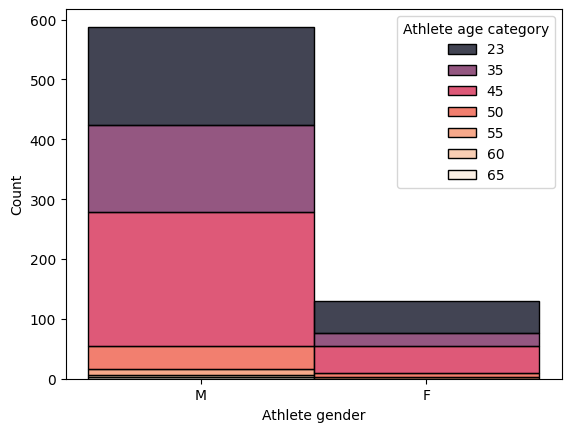

In [367]:


sns.histplot(df3,x ='Athlete gender', hue ='Athlete age category',multiple="stack", palette ='rocket')

<Axes: xlabel='event', ylabel='Athlete average speed'>

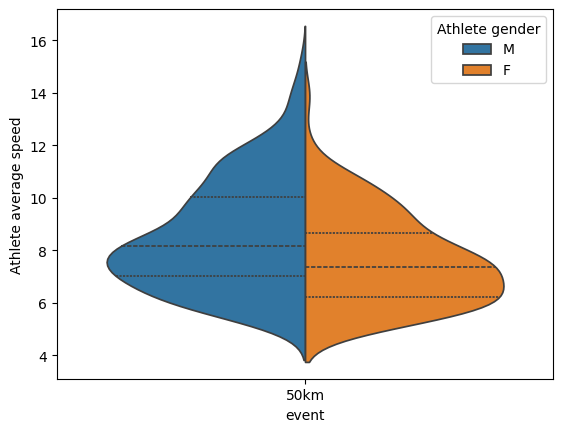

In [368]:
sns.violinplot(data=df3,x='event',y='Athlete average speed', hue ='Athlete gender',split =True, inner ='quartile')

In [369]:
df3['event']

1873698    50km
1873699    50km
1873700    50km
1873701    50km
1873702    50km
           ... 
2437856    50km
2437857    50km
2437859    50km
2437862    50km
2437863    50km
Name: event, Length: 717, dtype: object

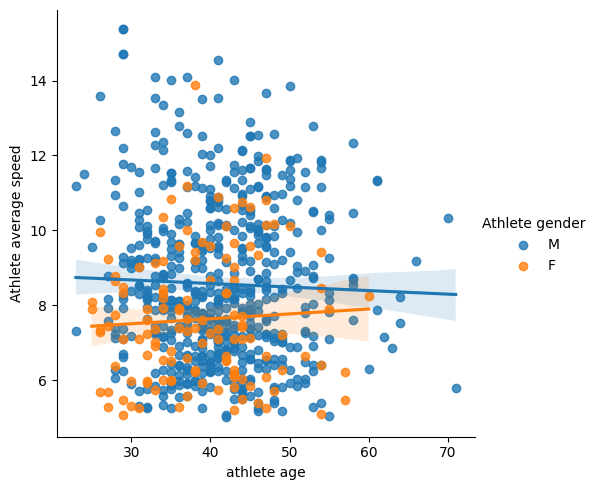

In [370]:
sns.lmplot(data=df3, x ='athlete age', y ='Athlete average speed', hue ='Athlete gender')

In [371]:
df3.groupby(['Athlete gender'])['Athlete average speed'].mean()

Athlete gender
F    7.622093
M    8.570803
Name: Athlete average speed, dtype: float64

In [372]:
df3.groupby('athlete age')['Athlete average speed'].agg(['mean','count']).sort_values('mean',ascending = False).query('count>5')

,mean,count
athlete age,,
50,9.940231,13
58,9.394333,6
29,9.365818,22
47,9.049182,33
26,9.028167,6
54,8.879727,11
33,8.753000,26
45,8.737943,35
31,8.722176,17


In [373]:
df3['race_month']=df3['race_day'].str.split('.').str.get(1).astype(int)

In [374]:
df3.head()

,year,race_day,Event name,event,performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete age,race_month
1873698,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,3:57:28,POL,M,23,12.633,321631,33,4
1873699,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,3:58:03,POL,M,35,12.602,227705,37,4
1873700,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:04:21,POL,M,23,12.277,211723,33,4
1873701,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:07:03,POL,M,23,12.143,204917,34,4
1873702,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:22:36,POL,M,35,11.424,661097,38,4


In [375]:
#race season
#is summer slowert than winter?

df3['race_month']= df3['race_day'].str.split('.').str.get(1).astype(int)
df3.head()

,year,race_day,Event name,event,performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete age,race_month
1873698,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,3:57:28,POL,M,23,12.633,321631,33,4
1873699,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,3:58:03,POL,M,35,12.602,227705,37,4
1873700,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:04:21,POL,M,23,12.277,211723,33,4
1873701,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:07:03,POL,M,23,12.143,204917,34,4
1873702,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:22:36,POL,M,35,11.424,661097,38,4


In [376]:
df3['race_season'] = df3['race_month'].apply(lambda x:'Winter' if x>11 else 'Fall' if x >8 else 'Summer' if x > 5 else 
                                              'Spring' if x>2 else 'Winter')

In [377]:
df3.head(40)

,year,race_day,Event name,event,performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete age,race_month,race_season
1873698,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,3:57:28,POL,M,23,12.633,321631,33,4,Spring
1873699,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,3:58:03,POL,M,35,12.602,227705,37,4,Spring
1873700,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:04:21,POL,M,23,12.277,211723,33,4,Spring
1873701,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:07:03,POL,M,23,12.143,204917,34,4,Spring
1873702,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:22:36,POL,M,35,11.424,661097,38,4,Spring
1873703,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:25:42,POL,M,23,11.291,211727,35,4,Spring
1873704,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:28:04,POL,M,45,11.191,238405,50,4,Spring
1873705,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:29:15,POL,M,45,11.142,211725,43,4,Spring
1873706,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:31:56,POL,M,23,11.032,191771,31,4,Spring
1873707,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:37:50,POL,M,35,10.798,211736,40,4,Spring


In [378]:
df3.groupby('race_season')['Athlete average speed'].agg(['mean','count']).sort_values('mean' ,ascending=False)

,mean,count
race_season,,
Fall,10.825277,177
Summer,8.473313,96
Spring,7.417500,444
